In [ ]:
#Import Data
import pandas as pd

##Ecom_Cust_Survey = pd.read_csv('...',header = 0)
df = pd.read_csv('Ecom_Cust_Survey.csv',header = 0)
#/content/sample_data/Ecom_Cust_Survey.csv


In [ ]:
df.dropna(inplace=True) # to remove all the missing values rows..
#Q 1. How many customers have participated in the survey?
df.info()
#ANS: 11805


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust_num              11805 non-null  int64 
 1   Region                11805 non-null  object
 2   Age                   11805 non-null  int64 
 3   Order Quantity        11805 non-null  int64 
 4   Customer_Type         11805 non-null  object
 5   Improvement Area      11805 non-null  object
 6   Overall_Satisfaction  11805 non-null  object
dtypes: int64(3), object(4)
memory usage: 645.7+ KB


In [ ]:
#Q.2 Overall most of the customers are satisfied or dis-satisfied?
#total number of customers
print(df.shape)
print(df.head())


(11805, 7)
   Cust_num Region  Age  Order Quantity Customer_Type    Improvement Area  \
0         1   WEST   45              24         Prime     Product Quality   
1         2   EAST   20              75         Prime     Product Quality   
2         3   EAST   28              70         Prime  Packing & Shipping   
3         4  SOUTH   66              28         Prime          Website UI   
4         5   WEST   22              39         Prime          Website UI   

  Overall_Satisfaction  
0        Dis Satisfied  
1            Satisfied  
2            Satisfied  
3        Dis Satisfied  
4            Satisfied  


In [ ]:
#number of satisfied customers
satisfied = df['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int).sum()
print('Satisfied Customer Count',satisfied)
#number of dis-satisfied customers
print('Dis-Satisfied Customer Count',df.shape[0]-satisfied)


Satisfied Customer Count 5397
Dis-Satisfied Customer Count 6408


In [ ]:
#Q 3. Can you segment the data and find the concentrated satisfied and dis-satisfied customer segments ?
#solution:
# We will create a tree model in python using the sci-kit module
# before that we will need to convert most of the feature data into numerical or hash values as scikit only works with numerical data
# Welcome to variable transformation

df['Region'] = df['Region'].map( {'EAST': 1, 'WEST': 2, 'NORTH': 3, 'SOUTH':4} ).astype(int)
df['Customer_Type'] = df['Customer_Type'].map({'Prime': 1, 'Non_Prime': 0}).astype(int)


In [ ]:
df.columns

Index(['Cust_num', 'Region', 'Age', 'Order Quantity', 'Customer_Type',
       'Improvement Area', 'Overall_Satisfaction'],
      dtype='object')

In [ ]:
#We will also need to change the column names, as '.' and spaces are part of many basic funcions in python
df.rename(columns={'Order Quantity':'Order_Quantity', 'Improvement Area' :'Improvement_Area'}, inplace=True)
df['Improvement_Area'] = df['Improvement_Area'].map({'Website UI':1, 'Packing & Shipping':2, 'Product Quality':3,}).astype(int)
df['Overall_Satisfaction'] = df['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int)


In [ ]:
df.head()

,Cust_num,Region,Age,Order_Quantity,Customer_Type,Improvement_Area,Overall_Satisfaction
0,1,2,45,24,1,3,0
1,2,1,20,75,1,3,1
2,3,1,28,70,1,2,1
3,4,4,66,28,1,1,0
4,5,2,22,39,1,1,1


In [ ]:
#Need the library to create the tree
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df.head(3)

,Cust_num,Region,Age,Order_Quantity,Customer_Type,Improvement_Area,Overall_Satisfaction
0,1,2,45,24,1,3,0
1,2,1,20,75,1,3,1
2,3,1,28,70,1,2,1


In [ ]:
#Defining Features and lables
features= list(df.columns[2:6])
features

X = df[features]
y = df['Overall_Satisfaction']

#Building Tree Model
clf = DecisionTreeClassifier(max_depth=2)
# clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)


DecisionTreeClassifier(max_depth=2)

In [ ]:
features

['Age', 'Order_Quantity', 'Customer_Type', 'Improvement_Area']

In [ ]:
#What are the major characteristics of satisfied customers?

#Plotting the trees
#Unfortunately drawing a beautiful tree is not easy in python, Still
#you will need to install pydot
#use this command in your anaconda prompt: conda install -c anaconda pydot=1.0.28

from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO

In [ ]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


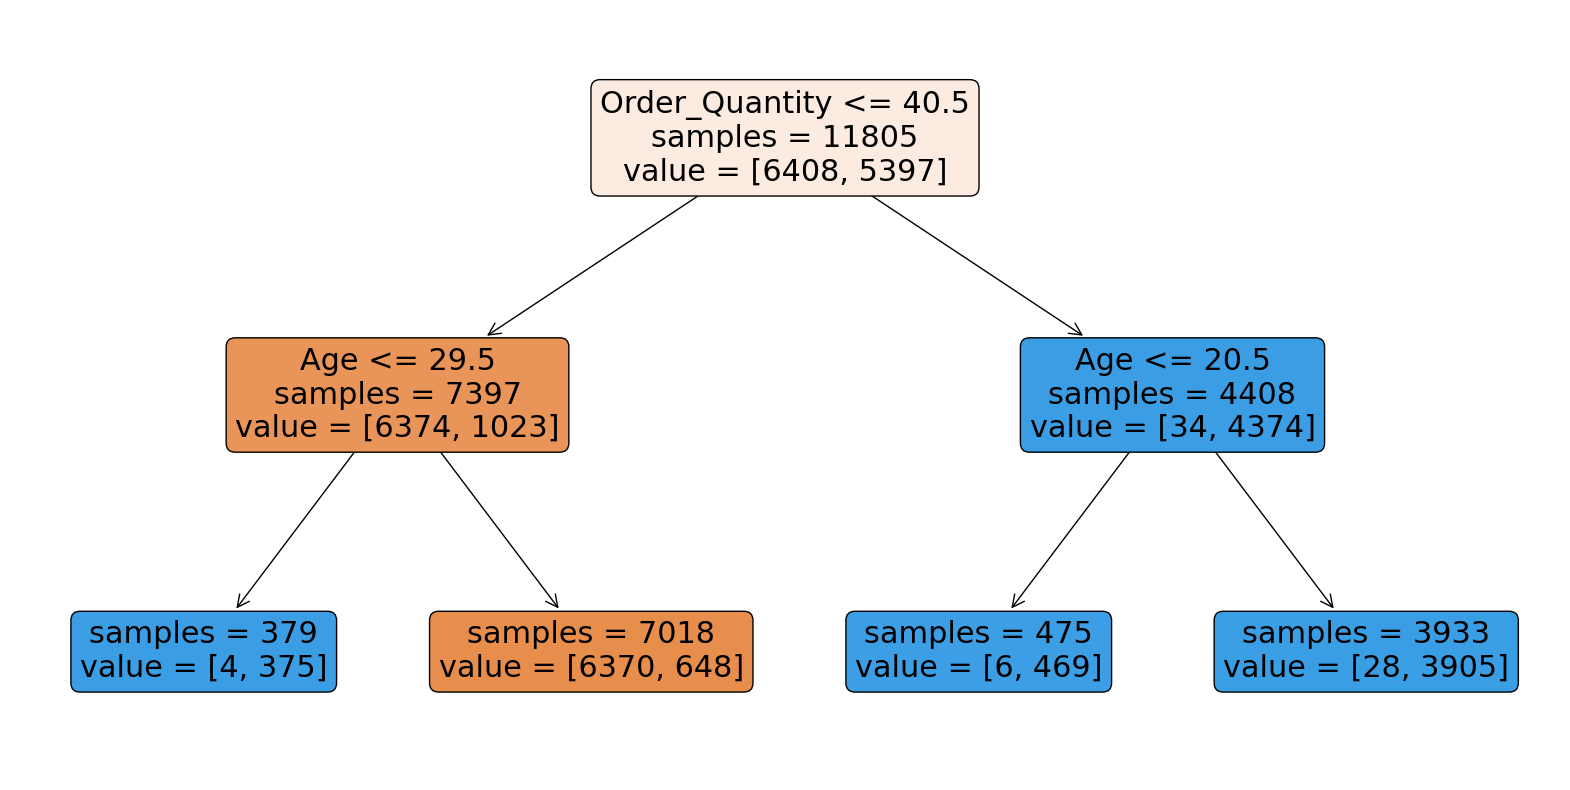

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# # Assuming 'clf' is your fitted DecisionTreeClassifier and 'features' is the list of feature names
# clf = DecisionTreeClassifier()  # Example instantiation; ensure clf is already fitted
# features = ['feature1', 'feature2', 'feature3']  # Replace with actual feature names

# Plot the decision tree
plt.figure(figsize=(20, 10))  # You can adjust the size as needed
plot_tree(clf, feature_names=features, filled=True, rounded=True, impurity=False)
plt.show()


In [ ]:
# prompt: give the code to download the above decision tree to .pdf

from sklearn.tree import export_graphviz
import pydotplus

# Export the decision tree to a file
export_graphviz(clf, out_file='decision_tree.dot', feature_names=features, rounded=True, filled=True)

# Convert the DOT file to a PDF file
!dot -Tpdf decision_tree.dot -o decision_tree.pdf


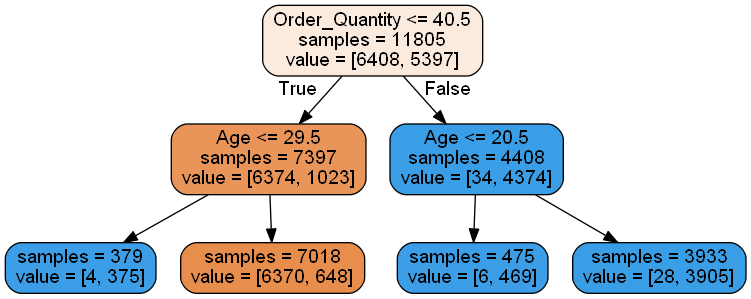

In [ ]:
###Have a latest version of jyputer and python installed, anaconda with python 3.5 and jupyter 4graphviz.2.3 is being used in this session
###We will need to install graphviz tool in our system and set the path in environment variables.
###Visit http://www..org/Download..php and find the optimal
##version for the computer.
###Get the path for gvedit.exe in install directory
##(for me it was "C:\Program Files (x86)\Graphviz2.38\bin\")
###goto start->computer->system properties->advanced settings->
## environment variables and add the path.
###We will need python package pydotplus(for older python versions pydot)
###use this command in your anaconda prompt:
## conda install -c conda-forge pydotplus
###if an error regarding version occure while installing the
## package go to https://anaconda.org/search?q=pydotplus
###this link will show the channel name of the suitable version suitable.
###and we can use use : conda install -c <channel name here> pydotplus
##

# import pydotplus
# import sklearn
# #from sklearn.tree import DecisionTreeClassifier, export_graphviz
# dot_data = StringIO()
# sklearn.tree.export_graphviz(clf,
#                      out_file = dot_data,
#                      feature_names = features,
#                      filled=True, rounded=True,
#                      impurity=False)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())


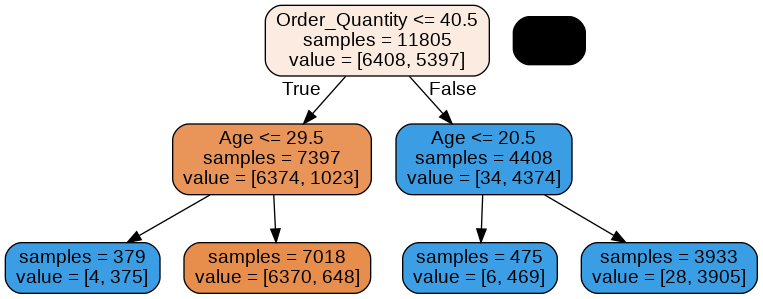

In [ ]:
###Have a latest version of jyputer and python installed, anaconda with python 3.5 and jupyter 4.2.3 is being used in this session
###We will need to install graphviz tool in our system and set the path in environment variables.
###Visit http://www.graphviz.org/Download..php and find the optimal
##version for the computer.
###Get the path for gvedit.exe in install directory
##(for me it was "C:\Program Files (x86)\Graphviz2.38\bin\")
###goto start->computer->system properties->advanced settings->
## environment variables and add the path.
###We will need python package pydotplus(for older python versions pydot)
###use this command in your anaconda prompt:
## conda install -c conda-forge pydotplus
###if an error regarding version occure while installing the
## package go to https://anaconda.org/search?q=pydotplus
###this link will show the channel name of the suitable version suitable.
###and we can use use : conda install -c <channel name here> pydotplus
##

import pydotplus
import sklearn
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
dot_data = StringIO()
sklearn.tree.export_graphviz(clf,
                     out_file = dot_data,
                     feature_names = features,
                     filled=True, rounded=True,
                     impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
